In [44]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import precision_score,accuracy_score,recall_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [45]:
df = pd.read_csv('/content/bank_marketing_Conversion_dataset.csv')

In [46]:
df

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted
...,...,...,...,...,...,...,...,...,...,...,...
45206,administrative_staff,50,high_school,divorced,mobile,May,6,114,1,unsuccessful,not_converted
45207,independent_worker,49,college,married,unidentified,May,13,98,1,unidentified,not_converted
45208,executive,30,college,married,mobile,June,12,175,2,other_outcome,not_converted
45209,retired_worker,59,elementary_school,married,landline,July,15,41,5,unidentified,not_converted


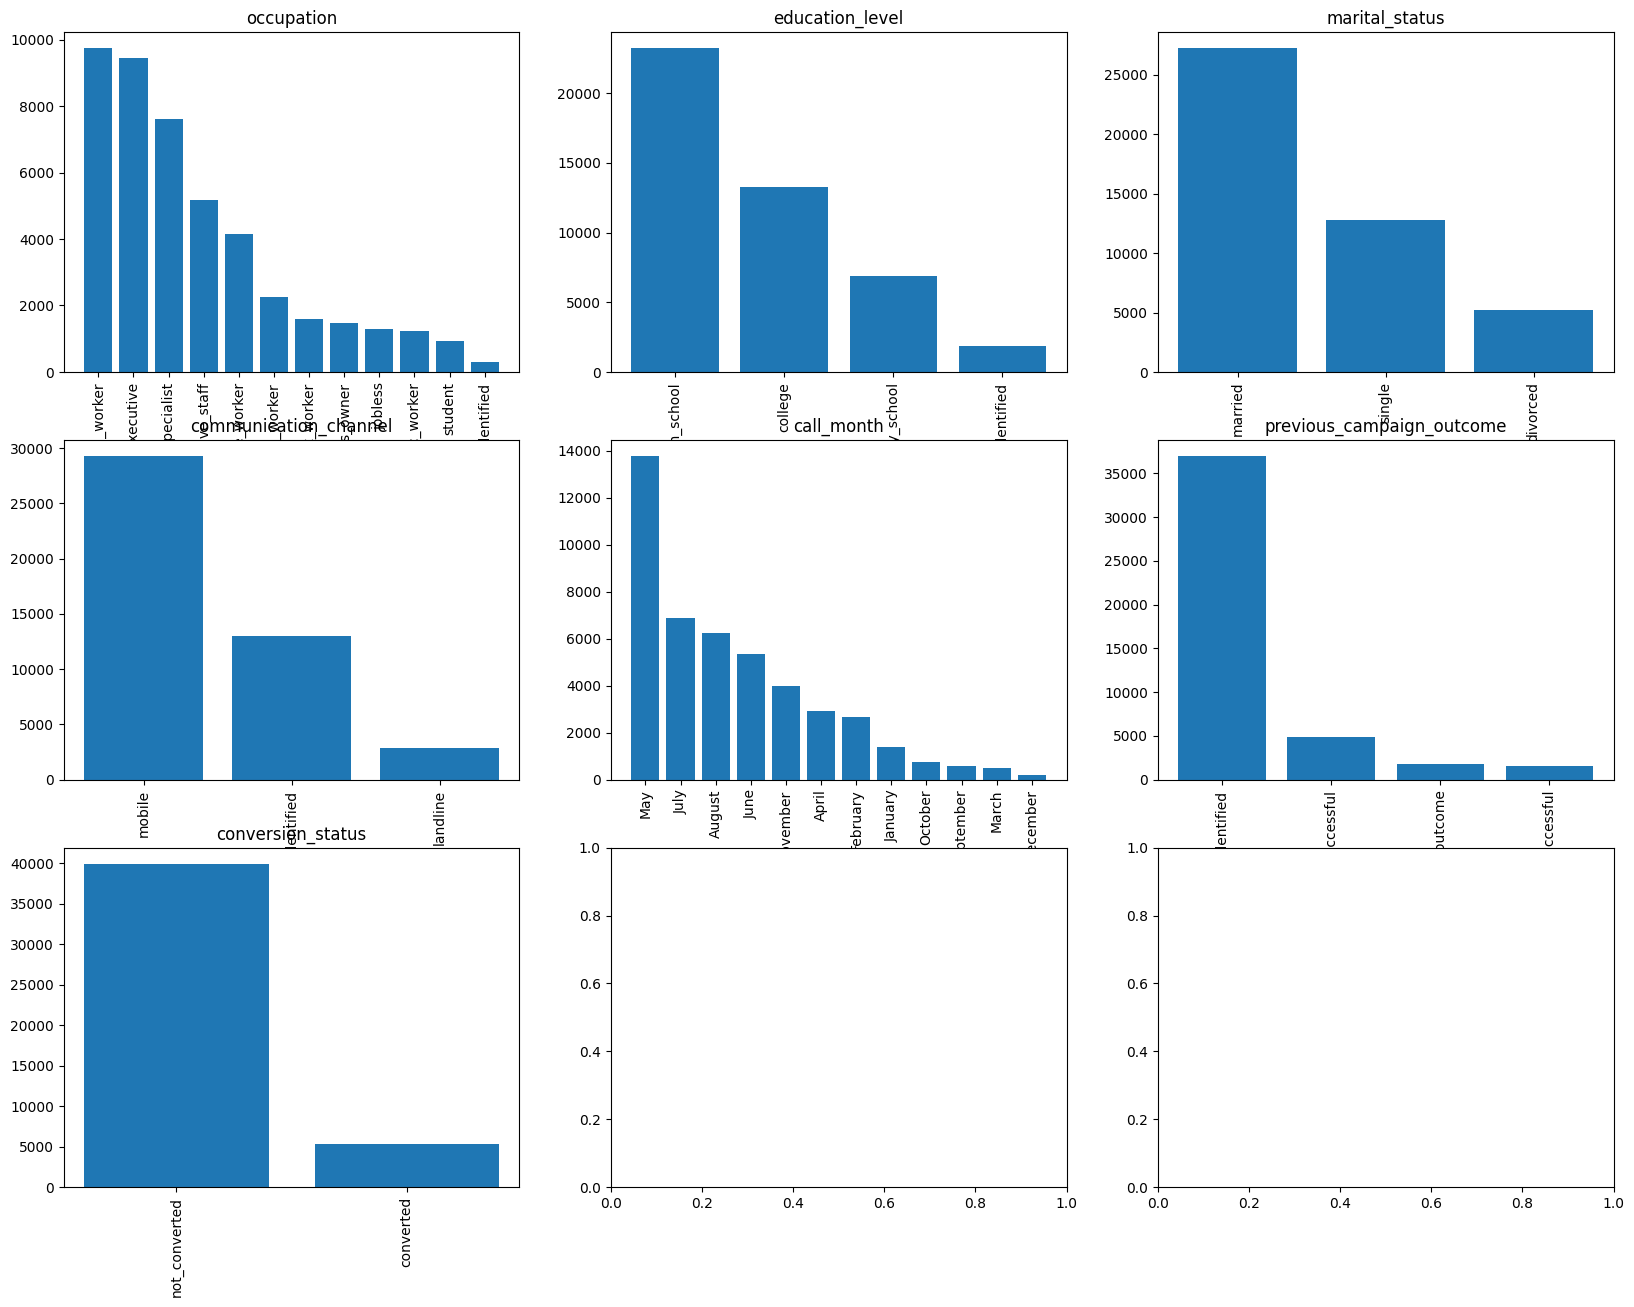

In [47]:
cat_columns = ['occupation', 'education_level', 'marital_status', 'communication_channel', 'call_month', 'previous_campaign_outcome', 'conversion_status']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axs[trace_x, trace_y].set_title(cat_column)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()


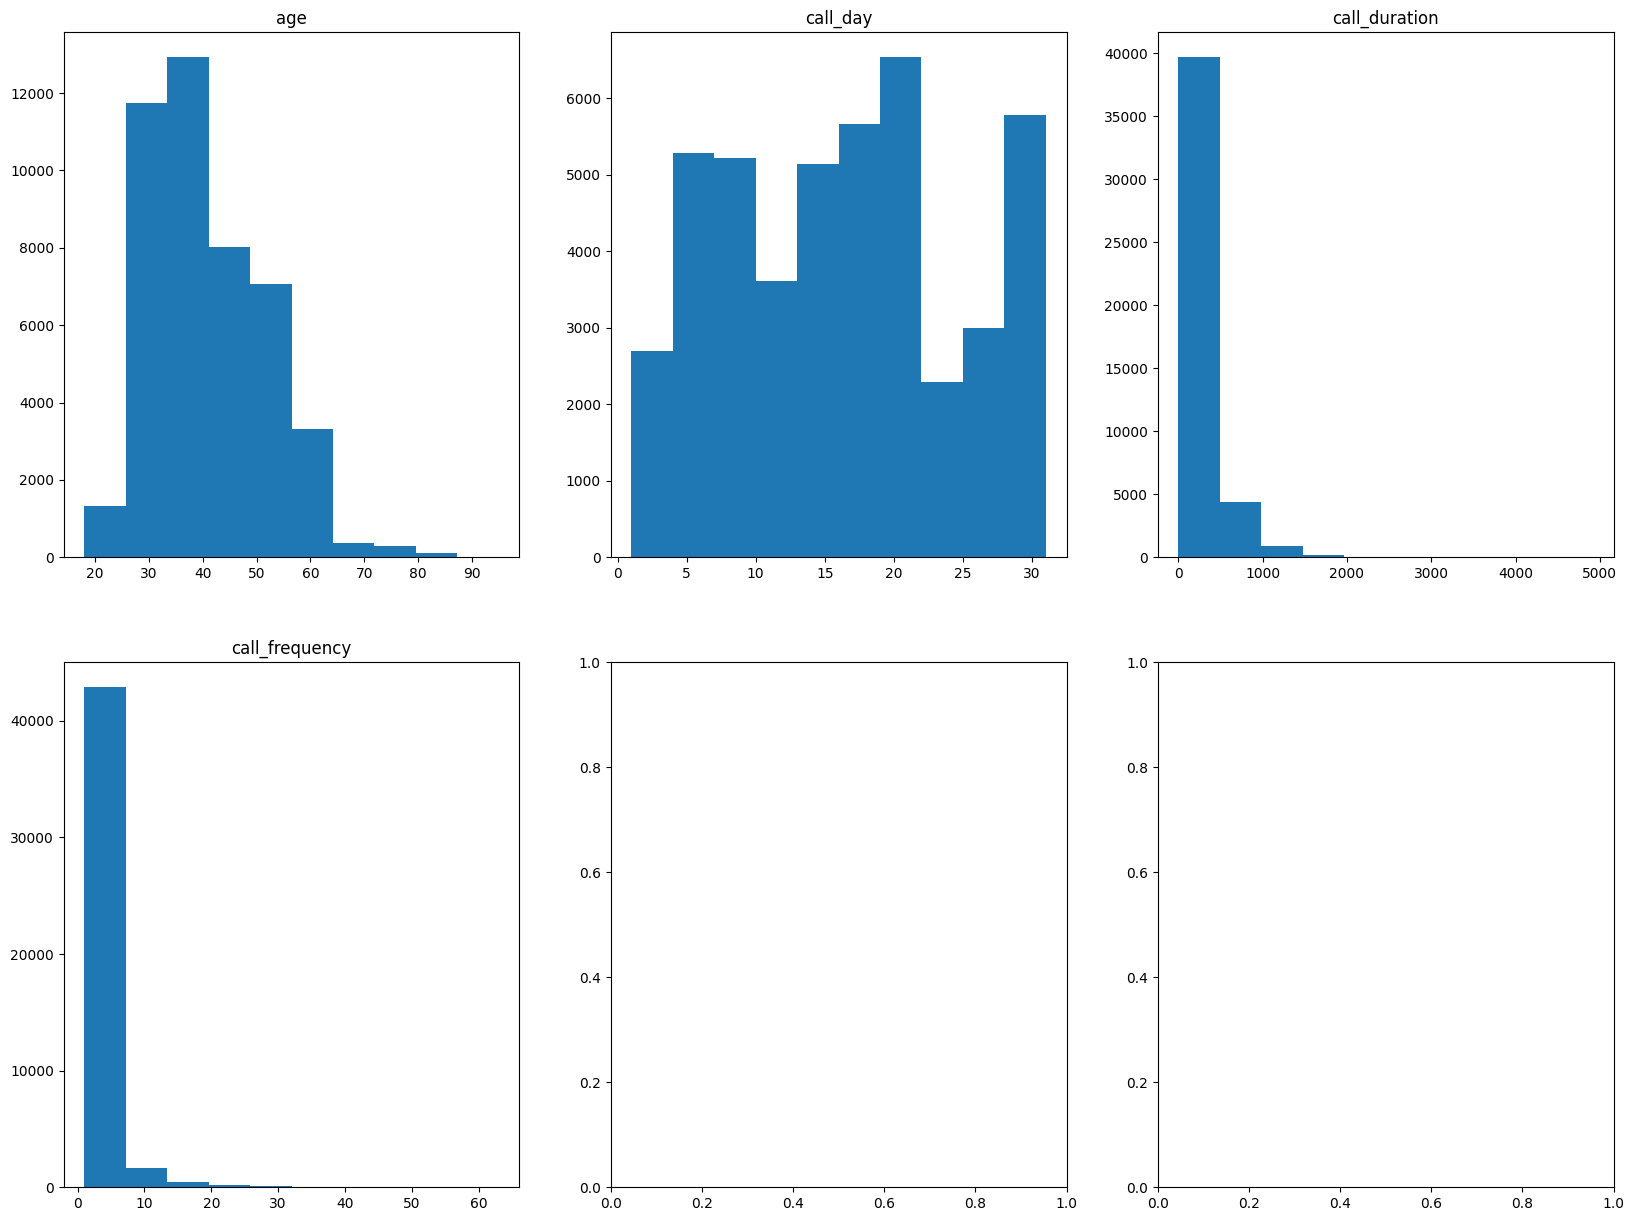

In [48]:
num_columns = ['age', 'call_day','call_duration', 'call_frequency']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:

    trace_x = counter // 3
    trace_y = counter % 3

    axs[trace_x, trace_y].hist(df[num_column])

    axs[trace_x, trace_y].set_title(num_column)

    counter += 1

plt.show()

<Axes: title={'center': 'Conversion status'}, xlabel='conversion_status'>

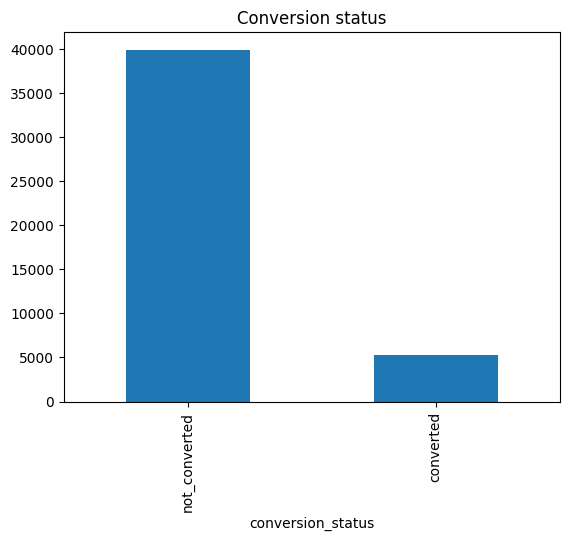

In [49]:
value_counts = df['conversion_status'].value_counts()

value_counts.plot.bar(title = 'Conversion status')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'call_day'}>],
       [<Axes: title={'center': 'call_duration'}>,
        <Axes: title={'center': 'call_frequency'}>]], dtype=object)

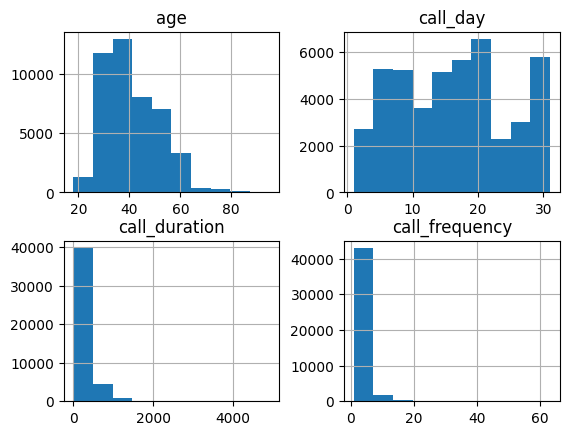

In [50]:
df.hist()

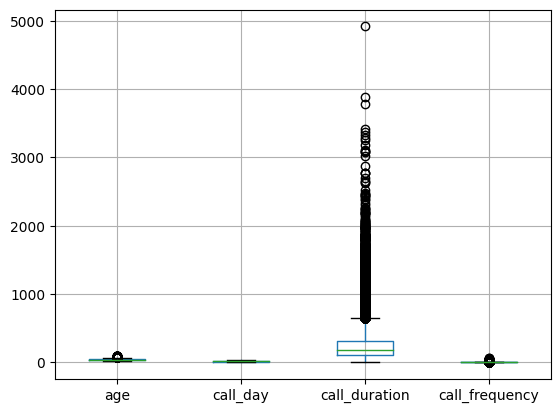

In [51]:
df.boxplot();

In [52]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_columns' contains the names of your categorical columns
categorical_columns = ['occupation', 'education_level', 'marital_status', 'communication_channel', 'call_month', 'previous_campaign_outcome', 'conversion_status']

label_encoder = LabelEncoder()

# Dictionary to store original and transformed values
transformed_values = {}

for column in categorical_columns:
    # Fit label encoder and transform values to integers
    df[column] = label_encoder.fit_transform(df[column])

    # Store original and transformed values
    transformed_values[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("DataFrame after label encoding:")
print(df.head())

print("\nUnique values and their replaced values:")
for column, values_dict in transformed_values.items():
    print(f"\nColumn: {column}")
    print("Original Value : Encoded Value")
    for value, encoded_value in values_dict.items():
        print(f"{value} : {encoded_value}")


DataFrame after label encoding:
   occupation  age  education_level  marital_status  communication_channel  \
0           0   28                2               1                      2   
1           0   58                3               1                      2   
2           5   40                2               0                      1   
3           7   63                2               1                      1   
4           1   43                0               1                      0   

   call_month  call_day  call_duration  call_frequency  \
0          11         9              1               1   
1           6         5            307               2   
2           3         4            113               1   
3           0         7             72               5   
4           5        29            184               4   

   previous_campaign_outcome  conversion_status  
0                          1                  1  
1                          2                  1  


In [53]:
df

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,0,28,2,1,2,11,9,1,1,1,1
1,0,58,3,1,2,6,5,307,2,2,1
2,5,40,2,0,1,3,4,113,1,2,1
3,7,63,2,1,1,0,7,72,5,2,1
4,1,43,0,1,0,5,29,184,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,0,50,2,0,1,8,6,114,1,3,1
45207,4,49,0,1,2,8,13,98,1,2,1
45208,3,30,0,1,1,6,12,175,2,0,1
45209,7,59,1,1,0,5,15,41,5,2,1


In [54]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Display unique values for each categorical column
for column in categorical_columns:
    print(f"{column}:")
    print(df[column].value_counts())
    print()

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    # Fit label encoder and transform values to integers
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   occupation  age  education_level  marital_status  communication_channel  \
0           0   28                2               1                      2   
1           0   58                3               1                      2   
2           5   40                2               0                      1   
3           7   63                2               1                      1   
4           1   43                0               1                      0   

   call_month  call_day  call_duration  call_frequency  \
0          11         9              1               1   
1           6         5            307               2   
2           3         4            113               1   
3           0         7             72               5   
4           5        29            184               4   

   previous_campaign_outcome  conversion_status  
0                          1                  1  
1                          2                  1  
2                          2    

In [56]:
df.nunique()

occupation                     12
age                            77
education_level                 4
marital_status                  3
communication_channel           3
call_month                     12
call_day                       31
call_duration                1573
call_frequency                 48
previous_campaign_outcome       4
conversion_status               2
dtype: int64

In [57]:
df.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

In [58]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)

# interquartile range (IQR)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (numerical_data < lower_bound) | (numerical_data > upper_bound)

print("Number of Outliers:")
print(outliers.sum())

Number of Outliers:
occupation                      0
age                           487
education_level                 0
marital_status                  0
communication_channel           0
call_month                      0
call_day                        0
call_duration                3235
call_frequency               3064
previous_campaign_outcome    8252
conversion_status            5289
dtype: int64


In [59]:
df

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,0,28,2,1,2,11,9,1,1,1,1
1,0,58,3,1,2,6,5,307,2,2,1
2,5,40,2,0,1,3,4,113,1,2,1
3,7,63,2,1,1,0,7,72,5,2,1
4,1,43,0,1,0,5,29,184,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,0,50,2,0,1,8,6,114,1,3,1
45207,4,49,0,1,2,8,13,98,1,2,1
45208,3,30,0,1,1,6,12,175,2,0,1
45209,7,59,1,1,0,5,15,41,5,2,1


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Assuming 'df' contains your dataset where the last column is the target variable
# Splitting the data into features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logistic_regression = LogisticRegression()

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_preds = logistic_regression.predict(X_train)
y_test_preds = logistic_regression.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_preds)
test_accuracy = accuracy_score(y_test, y_test_preds)

# Calculate precision scores
train_precision = precision_score(y_train, y_train_preds)
test_precision = precision_score(y_test, y_test_preds)

# Print the results
print('Logistic Regression accuracy score for train: %.4f, test: %.3f' % (train_accuracy, test_accuracy))
print('Logistic Regression precision score for train: %.4f, test: %.3f' % (train_precision, test_precision))


Logistic Regression accuracy score for train: 0.8901, test: 0.886
Logistic Regression precision score for train: 0.9017, test: 0.898


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

# Assuming 'df' contains your dataset where the last column is the target variable
# Splitting the data into features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                    colsample_bytree=1, max_depth=7)

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_preds)
test_accuracy = accuracy_score(y_test, y_test_preds)

# Calculate precision scores
train_precision = precision_score(y_train, y_train_preds)
test_precision = precision_score(y_test, y_test_preds)

# Print the results
print('XGBClassifier accuracy score for train: %.4f, test: %.3f' % (train_accuracy, test_accuracy))
print('XGBClassifier precision score for train: %.4f, test: %.3f' % (train_precision, test_precision))


XGBClassifier accuracy score for train: 0.9333, test: 0.905
XGBClassifier precision score for train: 0.9473, test: 0.931


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Assuming 'df' contains your dataset where the last column is the target variable
# Splitting the data into features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                    colsample_bytree=1, max_depth=7)

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_preds)
test_accuracy = accuracy_score(y_test, y_test_preds)

# Calculate precision scores
train_precision = precision_score(y_train, y_train_preds)
test_precision = precision_score(y_test, y_test_preds)

# Calculate F1 scores
train_f1 = f1_score(y_train, y_train_preds)
test_f1 = f1_score(y_test, y_test_preds)

# Print the results
print('XGBClassifier accuracy score for train: %.4f, test: %.3f' % (train_accuracy, test_accuracy))
print('XGBClassifier precision score for train: %.4f, test: %.3f' % (train_precision, test_precision))
print('XGBClassifier F1 score for train: %.4f, test: %.3f' % (train_f1, test_f1))


XGBClassifier accuracy score for train: 0.9333, test: 0.905
XGBClassifier precision score for train: 0.9473, test: 0.931
XGBClassifier F1 score for train: 0.9629, test: 0.947


In [63]:
user_input = np.array([   # Sample 4
    [10, 34, 0, 0, 2, 8, 29, 578, 3, 2]   # Sample 5
])

predictions = xgb.predict(user_input)

# Print the predictions
print("Predictions for the predefined user input:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: {pred}")

Predictions for the predefined user input:
Sample 1: 1


In [64]:
user_input = np.array([   # Sample 4
    [5 , 64,2 , 0 , 1 , 7 , 8 , 409 , 1 , 2]   # Sample 5
])

predictions = xgb.predict(user_input)

# Print the predictions
print("Predictions for the predefined user input:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: {pred}")

Predictions for the predefined user input:
Sample 1: 0


In [65]:
import pickle

pickle.dump(xgb , open('model.pkl' , 'wb'));